#**Keywords in the Curriculum Guidelines of Communist China（中國《义务教育课程方案和课程标准（2022年版）》關鍵字）**

**1. 簡單介紹這篇歷史文告的重要性。**

《义务教育课程方案和课程标准（2022年版）》 issued by the Chinese government is crucial for analyzing the shifts in educational policies and priorities in China. It helps understand the emphasis on different subjects, pedagogical approaches, and educational values. This text may reveal trends in education reform, highlighting focuses on moral education, communist values, and the integration of the socialist ideology into the curriculum.

**2. 檢查斷詞的準確率（百分之多少？），說明最可能出錯的情況。**

The accuracy for word segmentation with jieba is roughly 90%, based on visually inspecting random samples of 40-word sequences for ten times.


**3. 檢查詞性的的準確程度。**

The accuracy for pos tagging with jieba is roughly 95%, based on visually inspecting the pos tags associated with each word.

**4. 最常出現的詞彙（token）。列出前幾個，統計次數。**

The top 10 tokens in terms of frequency include '课程' (142 times), '学生' (53 times), '教育' (51 times), '学习' (35 times), '要求' (34 times), '评价' (33 times), '义务教育' (30 times), '实施' (30 times), '活动' (29 times), and '发展' (28 times).

**5. 測試關鍵字篩選的準確程度 TFIDF vs Textrank。**

The effectiveness of the `tfidf` and `textrank` methods for choosing keywords is roughly equal to the outcomes previously determined by the `Counter` method.

`tfidf`: ['课程', '学生', '教育', '义务教育', '一至', '学习', '评价', '育人', '九年', '注重']

`textrank`: ['课程', '学生', '教育', '学习', '评价', '发展', '要求', '活动', '实施', '注重']

**6. 本作業給你的啟示。**

Based on the extracted keywords (especially nouns) in Compulsory Education Curriculum Plan and Curriculum Standards (2022 Edition), it is obvious that the Ministry of Education in China aims not simply at the curriculm or course planning itself but also at political indoctrination of communist values. This is evident as the keywords '國家' (18 times), '社會' (14 times) and '社會主義' (14 times) frequently occur in the data. The result is definitely not surprising, but it provides a piece of evidence for the integration of political ideology into the educational framework by the Communist Party of China.

##**Access Google Drive**

In [1]:
import os
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Set paths for opening and storing data
open_path = "/content/drive/MyDrive/my python/people/"
store_path = "/content/drive/MyDrive/my python/"
print('讀取檔案的路徑，open_path 為>>>', open_path)
print('儲存檔案的路徑，store_path 為>>>', store_path)

讀取檔案的路徑，open_path 為>>> /content/drive/MyDrive/my python/people/
儲存檔案的路徑，store_path 為>>> /content/drive/MyDrive/my python/


##**Load packages and Chinese font**

In [3]:
!pip install jieba

In [4]:
# Import packages
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import jieba
import jieba.posseg as pseg
import jieba.analyse
from collections import Counter

# Import Chinese font
from matplotlib.font_manager import fontManager
fontManager.addfont(open_path + 'TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family = 'Taipei Sans TC Beta')

##**Text preprocessing**

###**Remove non-Chinese characters**

In [5]:
# Read the file
with open(store_path + 'extracted_curr.txt', 'r', encoding='utf-8') as file:
    curriculum = file.readlines()  # Read each line of the file into a list

# Check the data
print(curriculum[:5])

['义务教育 课程方案 (2022年版 ) 中华人民共和国教育部制定 北京师范大学出版集团 BEIIING NORNIAL UNIERSIIY PUBLISHIS CNOUP 北京帅范大学出版社\n', '前  音 习近平总书记多次强调。课程教材要发挥培根铸魂。启智增慧的 作用。必须坚持马克思主义的指导地位。体现马克思主义中国化最新 成果。体现中国和中华民族风格,体现党和国家对教育的基本要求。 体现国家和民族基本价值观。体现人类文化知识积累和创新成果。 义务教育课程规定了教育目标。教育内容和教学基本要求。体现 囤家意志。在立德树人中发挥着关键作用。2001 年颁布的《义务教 育课程设置实验方案》和 2011年颁布的义务教育各课程标准。坚持 了正确的改革方向。体现了先进的教育理念。为基础教育质量提高作 出了积极贡献。随着义务教育全面普及。教育需求从 "有学上"  转向 《上好学",必须进一步明确 "培养什么人,怎样培养人,为谁培养 人",优化学校育人蓝图。当今世界科技进步日新月异。网络新媒体 迅速普及。人们生活。学习。工作方式不断改娈。儿童青少年成长环 境深刻娈化。人才培养面临新挑战。义务教育课程必须与时俱进。进 行修订完善。 一 指导思想 以习近平新时代中国特色社会主义思想为指导。全面贯彻党的教 育方针。遵循教育教学规律。落实立德树人根本任务。发展素质教 育。以人民为中心,扎根中国大地办教育。坚持德育为先。提升昝育\n', '义务教育  课程方案 (2022乍) 水平。加强体育美育。落实劳动教育。 反映时代特征。努力构建具有 中国特色。世界水准的义务教育课程体系。聚焦中国学生发展核心素 养。培养学生适应未来发展的正确价值观。必备品格和关键能力。引 导学生明确人生发展方向。成长为德智体美劳全面发展的社会主义建 设者和接班人。 二。修订原则 (一)坚持目标导向 认真学习领会习近平总书记关于教育的重要论述。全面落实有理 想。有本领。有担当的时代新入培养要求。确立课程修订的根本遵 循。谁确理解和把握党中央。国务院关于教育改革的各项要求。全面 落实习近平新时代中国特色社会主义思想。将社会主义先迸文化。革 命文化。中华优秀传统文化。国家安全。生命安全与健康等重大主题 教育有机融入课程。增强课程思想性。 (二)坚持问题导向 全面梳理课程改革的困难与问题。明确修订重点和任务。注重对

In [6]:
# Initialize a string to hold the concatenated cleaned texts
cleaned_text = ""

# Iterate over each text in the curriculum
for text in curriculum:
    # Keep only Chinese characters
    new_text = re.sub(r'[^\u4E00-\u9FFF]', ' ', text)
    # Replace one or more whitespace characters with a single space
    new_text = re.sub(r'\s+', ' ', new_text).strip()
    # Concatenate into one large string, separated by spaces
    cleaned_text += " " + new_text

# Check the results
print(cleaned_text[:100])

 义务教育 课程方案 年版 中华人民共和国教育部制定 北京师范大学出版集团 北京帅范大学出版社 前 音 习近平总书记多次强调 课程教材要发挥培根铸魂 启智增慧的 作用 必须坚持马克思主义的指导地位 体


###**Segment words with jieba**

In [7]:
# Remove the leading space
cleaned_text = cleaned_text.strip()

# Perform segmentation on the concatenated cleaned text
# Convert a generator to a list
words = list(jieba.cut(cleaned_text, cut_all = False))
words[:20]

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 0.910 seconds.
DEBUG:jieba:Loading model cost 0.910 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['义务教育',
 ' ',
 '课程',
 '方案',
 ' ',
 '年版',
 ' ',
 '中华人民共和国教育部',
 '制定',
 ' ',
 '北京师范大学',
 '出版',
 '集团',
 ' ',
 '北京',
 '帅范',
 '大学',
 '出版社',
 ' ',
 '前']

###**Remove stopwords**

In [8]:
# Access stop words file
stop_words_path = store_path + 'stopwords-zh.txt'

# Load stop words from a file
with open(stop_words_path, 'r', encoding='utf-8') as f:
    stop_words = set([line.strip() for line in f.readlines()])

In [9]:
# Filter out stop words from the list of words
filtered_words = [word for word in words if word not in stop_words]

# Join the filtered words back into a string (optional, depending on your use case)
clean_text = " ".join(filtered_words)

# Check the results
print(clean_text[:100])

义务教育   课程 方案   年版   中华人民共和国教育部 制定   北京师范大学 出版 集团   北京 帅范 大学 出版社   前   音   习近平 总书记 多次 强调   课程 教材 发挥 培


In [10]:
# Convert words to a list of strings
token = clean_text.split()
print(len(token))
print(token[:100])

3578
['义务教育', '课程', '方案', '年版', '中华人民共和国教育部', '制定', '北京师范大学', '出版', '集团', '北京', '帅范', '大学', '出版社', '前', '音', '习近平', '总书记', '多次', '强调', '课程', '教材', '发挥', '培根', '铸魂', '启智', '增慧', '作用', '必须', '坚持', '马克思主义', '指导', '地位', '体现', '马克思主义', '中国化', '最新', '成果', '体现', '中国', '中华民族', '风格', '体现', '党和国家', '教育', '基本', '要求', '体现', '国家', '民族', '基本', '价值观', '体现', '人类', '文化', '知识', '积累', '创新', '成果', '义务教育', '课程', '规定', '教育', '目标', '教育', '内容', '教学', '基本', '要求', '体现', '囤家', '意志', '立德', '树人', '发挥', '关键作用', '颁布', '义务', '教', '育', '课程', '设置', '实验', '方案', '颁布', '义务教育', '课程标准', '坚持', '正确', '改革', '方向', '体现', '先进', '教育', '理念', '基础教育', '质量', '提高', '作', '出', '积极']


##**Check the accuracy of segmentation results**

In [11]:
import random
# Sample a segment of strings
c=random.randint(1,len(token)-40)
check=" ".join(token[c:c+40])
print ("----------")
print(check)

# Repeat
c=random.randint(1,len(token)-40)
check=" ".join(token[c:c+40])
print ("----------")
print(check)

# Repeat
c=random.randint(1,len(token)-40)
check=" ".join(token[c:c+40])
print ("----------")
print(check)

----------
身心 发 展 阶段 特征 注重 幼儿园 小学 初中 高中 各学段 之间 衔接 体现 同学 段 目标 要求 层次性 共同 基础 关注 地区 学校 学生 差异 适当 增加 课程 选择性 提高 课程 适宜性 促进 教育 公平 聚焦 核心 素养 面向未来
----------
因事 因人 选择 评价 方式 手段 增强 评价 适 宜性 有效性 提高 作业 设计 质量 增强 针对性 丰富 类型 合理 安 排 难度 有效 减轻 学生 过重 学业 负担 优化 试题 结构 增强 试题 探 究性 开放性 综合性 提高 试题
----------
知识 学习 学生 经验 现实生活 社会 实践 之闻 联 系 注重 真实 情境 创设 增强 学生 认识 真实世界 解决 真实 间题 能力 推进 综合 学习 整体 理解 把握 学习 目标 注重 知识 学习 价值 教育 有机 融合 发挥 教学活动 多方面


In [12]:
# Count freuqencies of tokens
tokCounts = Counter(token)
tokMost=tokCounts.most_common(50)
tokDic=dict(tokMost)
tokDic

{'课程': 142,
 '学生': 53,
 '教育': 51,
 '学习': 39,
 '要求': 34,
 '评价': 33,
 '义务教育': 30,
 '实施': 30,
 '活动': 29,
 '发展': 28,
 '注重': 28,
 '九年': 26,
 '设置': 24,
 '学校': 23,
 '实践': 23,
 '新': 22,
 '综合': 22,
 '加强': 21,
 '教学': 20,
 '培养': 20,
 '强化': 20,
 '一至': 20,
 '国家': 18,
 '体现': 17,
 '内容': 17,
 '明确': 17,
 '育人': 17,
 '落实': 17,
 '能力': 17,
 '级': 17,
 '科学': 17,
 '地方': 17,
 '开设': 16,
 '课时': 16,
 '省级': 15,
 '行政部门': 15,
 '教材': 14,
 '坚持': 14,
 '基本': 14,
 '知识': 14,
 '改革': 14,
 '社会主义': 14,
 '增强': 14,
 '素养': 14,
 '社会': 14,
 '校本': 14,
 '教': 13,
 '课程标准': 13,
 '全面': 13,
 '方式': 13}

##**Extract keywords with `tfidf` & `textrank`**

In [13]:
# `tdidf` keywords
tfidf = jieba.analyse.extract_tags(clean_text, topK = 100)
print(tfidf)

['课程', '学生', '教育', '义务教育', '一至', '学习', '评价', '育人', '九年', '注重', '课时', '课程标准', '要求', '实施', '实践', '设置', '教学', '校本', '活动', '素养', '强化', '行政部门', '培养', '课程内容', '学校', '教材', '开设', '综合', '省级', '落实', '科目', '加强', '体现', '学制', '发展', '明确', '科学', '培养目标', '知识', '社会主义', '内容', '能力', '教研', '坚持', '增强', '习近平', '改革', '小学', '核心', '初中', '地方', '安排', '考试', '学业', '全面', '开展', '特色', '国家', '设计', '三至', '劳动', '基本', '时代', '健康', '艺术', '方案', '跨学科', '导向', '社会', '方式', '主题', '价值观', '文化', '学段', '衔接', '目标', '指导', '优化', '学科', '五四', '阶段', '质量', '具有', '把握', '正确', '意识', '二年级', '担当', '理念', '统筹', '年级', '价值', '六三', '编写', '娈革', '为本', '外语', '每周', '创新', '探究']


In [14]:
# `textrank` keywords
textrank = jieba.analyse.textrank(clean_text, topK = 100)
print(textrank)

['课程', '学生', '教育', '学习', '评价', '发展', '要求', '活动', '实施', '注重', '综合', '能力', '学校', '加强', '实践', '强化', '具有', '培养', '设置', '教学', '社会主义', '内容', '知识', '改革', '体现', '增强', '开设', '特色', '地方', '素养', '方式', '校本', '设计', '核心', '中国', '社会', '教材', '科学', '行政部门', '国家', '开展', '目标', '基本', '全面', '课程标准', '考试', '意识', '时代', '坚持', '安排', '价值', '提高', '创新', '科目', '组织', '指导', '导向', '把握', '建设', '课程内容', '学业', '主题', '艺术', '过程', '阶段', '质量', '文化', '教研', '跨学科', '衔接', '方向', '小学', '劳动', '学科', '相关', '发挥', '推进', '时间', '优化', '问题', '精神', '关键', '基础', '价值观', '观念', '合理', '情况', '规划', '思想', '担当', '专业', '监测', '统一', '促进', '融入', '生活', '规范', '探究', '提升', '技术']


##**POS tagging**

In [15]:
# POS tagging
pos_words = pseg.cut(clean_text)
dic = dict(pos_words)
keys = list(dic.keys())
print(len(keys))

# Print the POS tagging results
n = 0
for k in range(len(keys)):
  n += 1
  print(keys[k], dic[keys[k]])
  if n > 50:
     break

1122
义务教育 l
  x
课程 n
方案 n
年 m
版 n
中华人民共和国教育部 nt
制定 v
北京师范大学 nt
出版 v
集团 n
北京 ns
帅范 nr
大学 n
出版社 n
前 f
音 n
习近平 nrfg
总书记 n
多次 m
强调 v
教材 n
发挥 v
培根 nz
铸魂 n
启智 v
增慧 n
作用 v
必须 d
坚持 v
马克思主义 n
指导 n
地位 n
体现 v
中国化 nt
最新 d
成果 n
中国 ns
中华民族 nz
风格 n
党和国家 nz
教育 vn
基本 n
要求 v
国家 n
民族 n
价值观 n
人类 n
文化 n
知识 v
积累 v


In [16]:
# Check words of each POS tag
pos=['a',	'ad',	'an',	'd',	'n',	'nr',	'ns',	'nt',	'nz',	'v',	'vd',	'vn',	'i',	'l']
res=[]
for p in pos:
    res_=[x for x in dic.keys() if dic[x]==p]
    res.append(res_)
other_=[x for x in dic.keys() if dic[x] not in pos]
res.append(other_)

In [17]:
pos.append('other')
for n in range(len(res)):
  print (pos[n], len(res[n]),res[n])
  print ('*******************************')

a 44 ['先进', '新', '落实', '重要', '根本', '优秀', '健康', '重大', '有效', '凸显', '复兴', '大', '具体', '健全', '容', '强', '广大', '伟大', '坚定', '厚', '热爱', '幸福', '良好', '坚毅', '勇敢', '勤劳', '节俭', '诚', '珍爱', '尊严', '尊重', '适当', '值观', '独特', '长', '清晰', '兴趣爱好', '不同', '准确', '严', '丰富', '明晰', '全', '好']
*******************************
ad 10 ['正确', '积极', '明确', '迅速', '努力', '充分', '勤勉', '认真', '努', '直接']
*******************************
an 2 ['安全', '困难']
*******************************
d 35 ['必须', '最新', '进一步', '不断', '深刻', '确', '先', '终身', '进步', '更新', '一至', '正', '相互', '旋', '特', '初步', '真实', '自然', '并举', '共同', '立足', '原则上', '至少', '均', '不少', '特别', '须', '务', '必要', '必', '日常', '难度', '究性', '比较', '齐']
*******************************
n 449 ['课程', '方案', '版', '集团', '大学', '出版社', '音', '总书记', '教材', '铸魂', '增慧', '马克思主义', '指导', '地位', '成果', '风格', '基本', '国家', '民族', '价值观', '人类', '文化', '规定', '目标', '内容', '教学', '意志', '人', '关键作用', '义务', '课程标准', '方向', '理念', '质量', '贡献', '全面', '有学', '好学', '学校', '科技进步', '网络', '媒体', '方式', '儿童', '娈化', '指导思想', '时代', '特色', '社会主义', '思想'

##**Examine words by POS tag**

In [18]:
# Select nouns 'n'
pos_sel = res[pos.index('n')]
sel=[]
for k in token:
  if k in pos_sel:
    sel.append(k)
print(len(sel))
print(sel)

1534
['课程', '方案', '集团', '大学', '出版社', '音', '总书记', '课程', '教材', '铸魂', '增慧', '马克思主义', '指导', '地位', '马克思主义', '成果', '风格', '基本', '国家', '民族', '基本', '价值观', '人类', '文化', '成果', '课程', '规定', '目标', '内容', '教学', '基本', '意志', '关键作用', '义务', '课程', '方案', '课程标准', '方向', '理念', '质量', '贡献', '全面', '好学', '学校', '科技进步', '网络', '媒体', '方式', '儿童', '娈化', '课程', '指导思想', '时代', '特色', '社会主义', '思想', '指导', '全面', '党', '方针', '教学', '规律', '根本任务', '素质', '人民', '中心', '大地', '课程', '方案', '水平', '时代特征', '特色', '世界', '水准', '课程体系', '学生', '核心', '素', '学生', '价值观', '品格', '关键', '能力', '学生', '人生', '方向', '全面', '社会主义', '设者', '接班人', '原则', '目标', '导向', '认真学习', '领会', '总书记', '本领', '时代', '新入', '课程', '全面', '时代', '特色', '社会主义', '思想', '社会主义', '文化', '命', '文化', '传统', '文化', '国家', '主题', '有机', '课程', '课程', '思想性', '问题', '导向', '全面', '课程', '问题', '重点', '任务', '实际', '问题', '学生', '身心', '规律', '进学段', '课程', '科学性', '系统性', '学生', '价值', '课程内容', '提质', '细化', '目标', '课程', '指导性', '导向', '课程', '成功经验', '国际', '理念', '课程', '课程', '综合性', '实践性', '方', '娈革', '着力', '学生', '核心', '素养', '学生', '主体', '地位'

##**Keyword visualization**

###**Bar chart**

<BarContainer object of 30 artists>

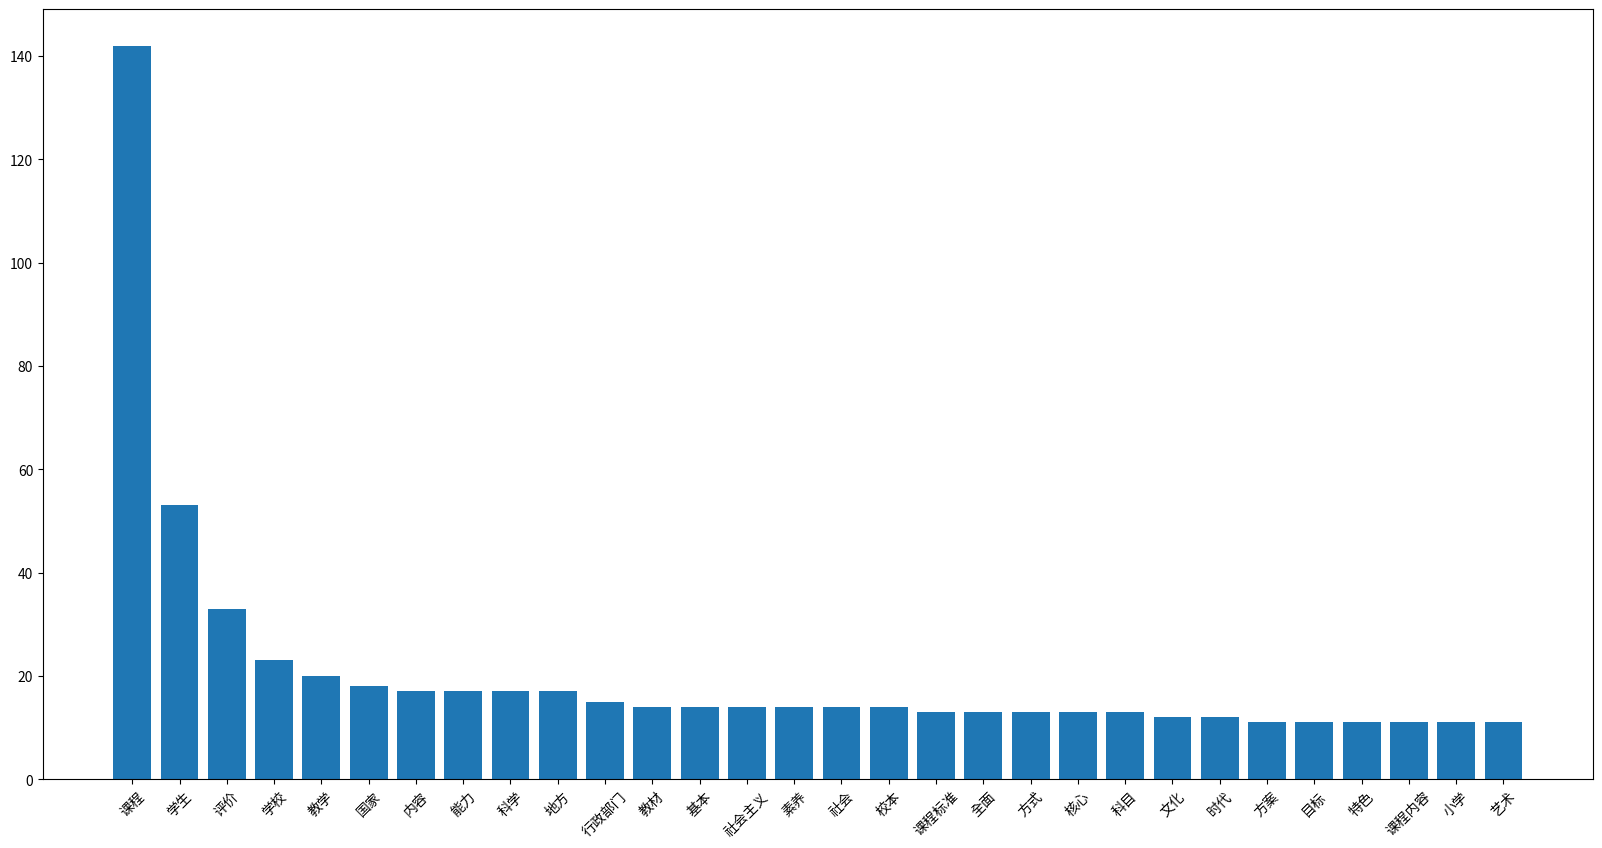

In [19]:
tok_sel = Counter(sel)
tokMost_sel = tok_sel.most_common(30)
tokDic = dict(tokMost_sel)

plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
plt.bar(list(tokDic.keys()), list(tokDic.values()))

###**Word cloud**

In [20]:
# Select first 1000 nouns
tokMost_sel = tok_sel.most_common(1000)
tokDic = dict(tokMost_sel)

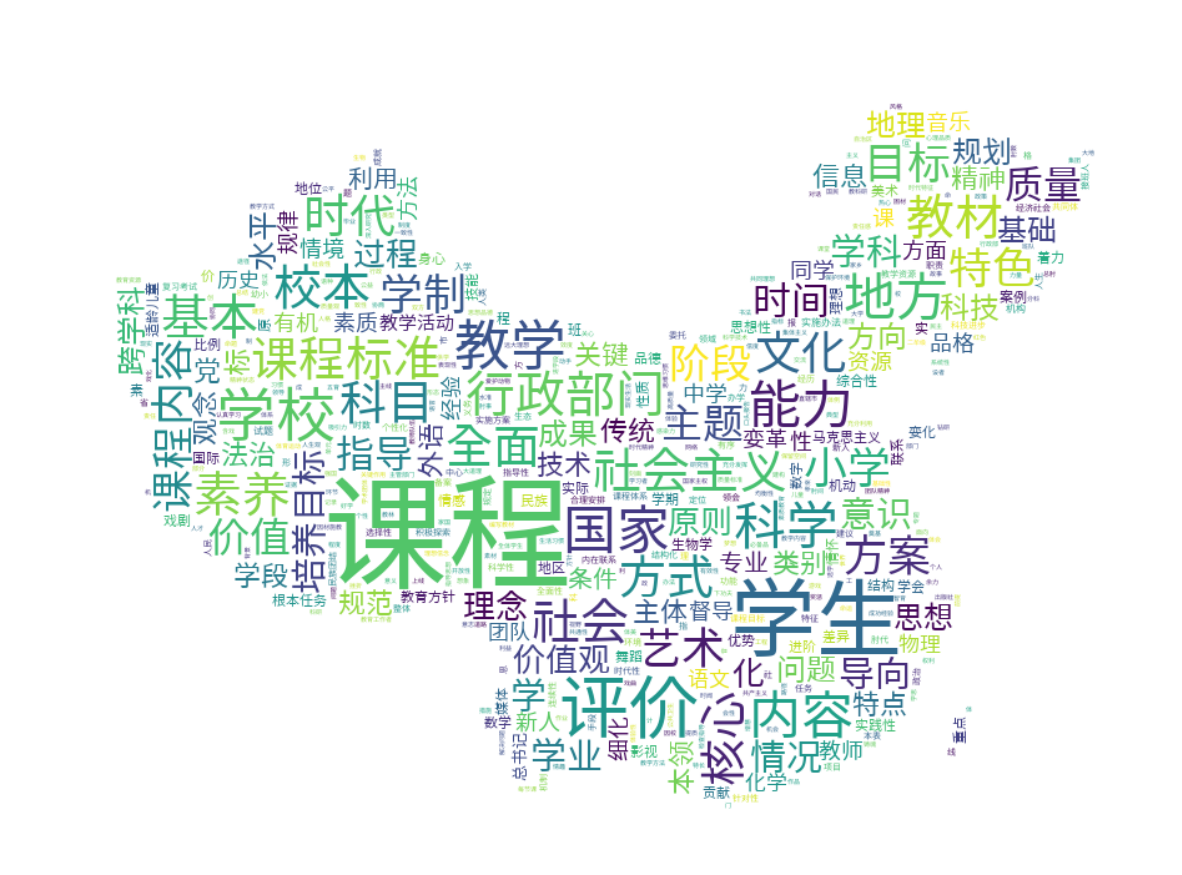

In [21]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from wordcloud import WordCloud, STOPWORDS
import collections

# Set parameters for plotting
title='textrank'
wrd_dict=tokDic
mask='china.png'
fp=open_path+'TaipeiSansTCBeta-Regular.ttf'
color='white'
max_font_size=100
min_font_size=2
max_words=1000
margin=2

# Set the mask = BKImg
BKImg=np.array(Image.open(open_path + "pic/" + mask))
wordcloud = WordCloud(font_path=fp,max_font_size=max_font_size, min_font_size = min_font_size
                      ,background_color="white", mask = BKImg, margin=margin, height=1000, max_words=max_words,width=1000)

# Plot with word freq dictionary
wordcloud = wordcloud.generate_from_frequencies(wrd_dict)

# Plot wordcloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# Select first 1000 words of the whole text
tokMost = tokCounts.most_common(1000)
tokDic = dict(tokMost)

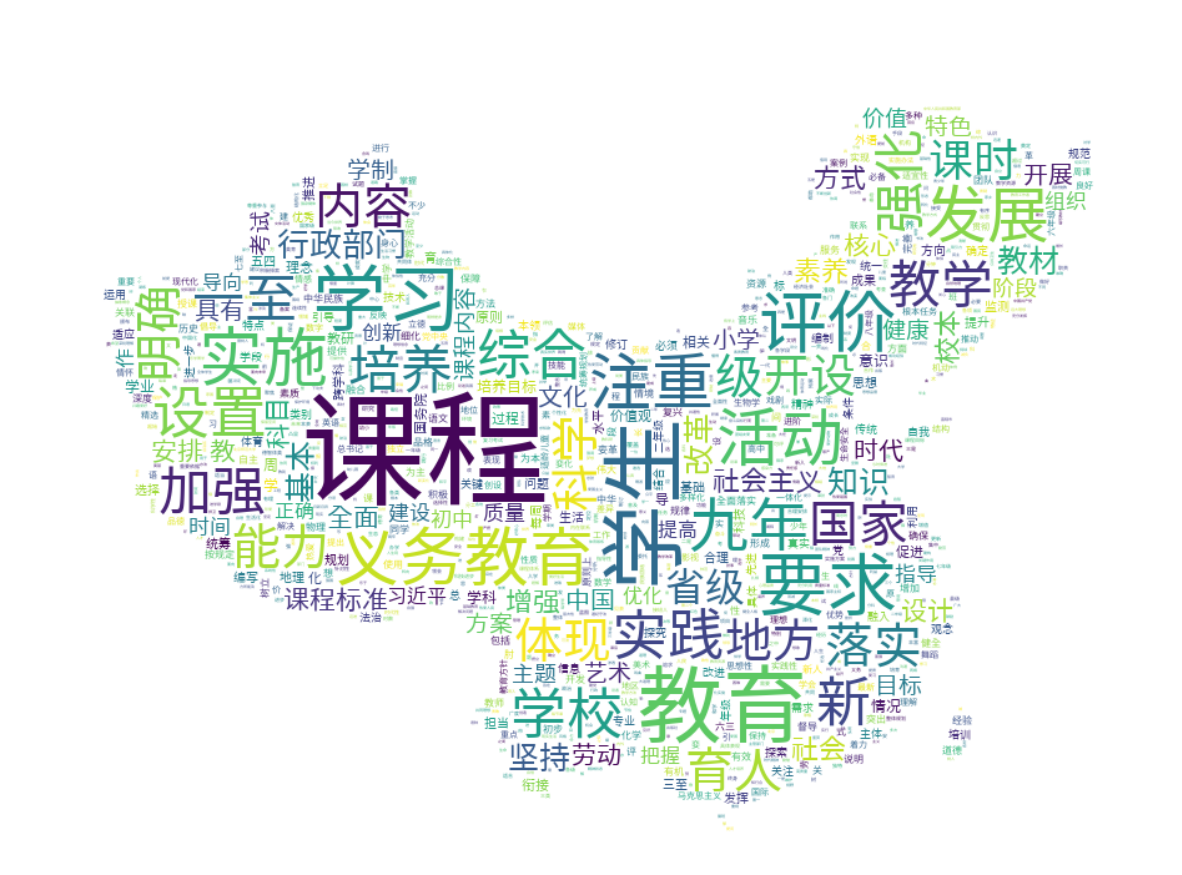

In [23]:
# Set parameters for plotting
title='textrank'
wrd_dict=tokDic
mask='china.png'
fp=open_path+'TaipeiSansTCBeta-Regular.ttf'
color='white'
max_font_size=100
min_font_size=2
max_words=1000
margin=2

# Set the mask = BKImg
BKImg=np.array(Image.open(open_path + "pic/" + mask))  ####################
wordcloud = WordCloud(font_path=fp,max_font_size=max_font_size, min_font_size = min_font_size
                      ,background_color="white", mask = BKImg, margin=margin, height=1000, max_words=max_words,width=1000)

# Plot with word freq dictionary
wordcloud = wordcloud.generate_from_frequencies(wrd_dict)

# Plot wordcloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()